In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import preprocessing

In [2]:
sal=pd.read_csv('D:/EXCELR FILES/Salary_Data.csv')
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
sal.columns = 'year','sal'

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

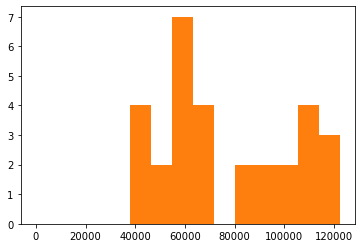

In [4]:
plt.hist(sal.year)
plt.hist(sal.sal)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c315ba9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22c315c40d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c315ba670>],
 'medians': [<matplotlib.lines.Line2D at 0x22c315c4790>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c315c4af0>],
 'means': []}

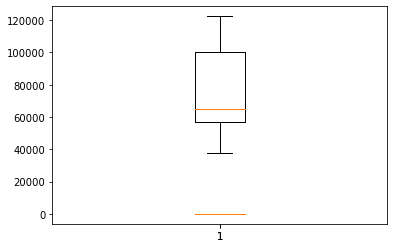

In [5]:
plt.boxplot(sal.year)
plt.boxplot(sal.sal)

In [6]:
#Normalising process
nsal = preprocessing.normalize(sal)
nsal

array([[2.79592303e-05, 1.00000000e+00],
       [2.81354832e-05, 1.00000000e+00],
       [3.97551085e-05, 9.99999999e-01],
       [4.59506031e-05, 9.99999999e-01],
       [5.51502844e-05, 9.99999998e-01],
       [5.11987570e-05, 9.99999999e-01],
       [4.98753117e-05, 9.99999999e-01],
       [5.87749104e-05, 9.99999998e-01],
       [4.96547443e-05, 9.99999999e-01],
       [6.46977564e-05, 9.99999998e-01],
       [6.16912903e-05, 9.99999998e-01],
       [7.16922965e-05, 9.99999997e-01],
       [7.02284178e-05, 9.99999998e-01],
       [7.18277534e-05, 9.99999997e-01],
       [7.36364973e-05, 9.99999997e-01],
       [7.21245840e-05, 9.99999997e-01],
       [7.72387888e-05, 9.99999997e-01],
       [6.37877911e-05, 9.99999998e-01],
       [7.25145334e-05, 9.99999997e-01],
       [6.38705555e-05, 9.99999998e-01],
       [7.41241359e-05, 9.99999997e-01],
       [7.22477179e-05, 9.99999997e-01],
       [7.79846398e-05, 9.99999997e-01],
       [7.20486414e-05, 9.99999997e-01],
       [7.950215

In [7]:
sal.corr()

,year,sal
year,1.000000,0.978242
sal,0.978242,1.000000


# Building model 1

In [8]:
mod1 = smf.ols('sal~year',data = sal).fit()
mod1.summary()
mod1.params

Intercept    25792.200199
year          9449.962321
dtype: float64

In [9]:
#predicting model 1
p1_sal = mod1.predict(sal)
p1_sal

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

Text(0, 0.5, 'salary')

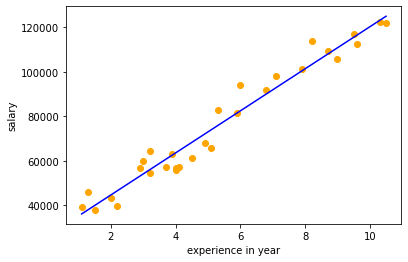

In [13]:
plt.scatter(sal.year,sal.sal,color='orange');plt.plot(sal.year,p1_sal,color='blue');plt.xlabel('experience in year');plt.ylabel('salary')

In [14]:
#Mean Square Error Function
def mse(y_pred,y_actual):
    a = y_pred
    b = y_actual
    mse = np.square(np.subtract(a,b)).mean()
    return mse

In [15]:
mse1 = mse(p1_sal,sal.sal)
mse1

31270951.722280964

# Building model 2

In [16]:
mod2 = smf.ols('sal~np.log(year)',data = sal).fit()
mod2.summary()
mod2.params

Intercept       14927.97177
np.log(year)    40581.98796
dtype: float64

In [17]:
#predicting model 2
p2_sal = mod2.predict(sal)
p2_sal

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

Text(0, 0.5, 'salary')

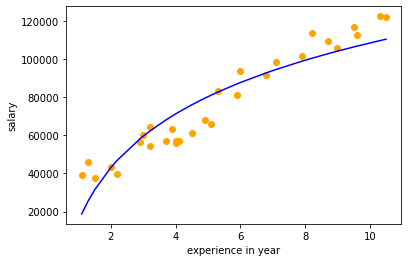

In [18]:
plt.scatter(sal.year,sal.sal,color='orange');plt.plot(sal.year,p2_sal,color='blue');plt.xlabel('experience in year');plt.ylabel('salary')

In [19]:
mse2 = mse(p2_sal,sal.sal)
mse2

106149618.72183885

# From camparing R-Squared Values
# Modue 1 is better model for prediction